In [15]:
import json
import pandas as pd

# Exploratory data analysis

## Parte I

### Background

Nuevo sitio cuenta con una sección donde los visitantes del Restaurant dejan sus comentarios y una valoración de su visita. 
En el sitio web anterior dejaban comentarios de su experiencia en el local pero sin valoración.

### Task

Desarrollo de un modelo que sea capaz de valorar los comentarios de su antiguo sitio.

### Data

**reviews.json**: Archivo de comentarios de clientes de otros negocios que tienen valoraciones de 1 a 5 estrellas.  
**business.json**: Informacion de los negocios.



In [16]:
with open('challenge/reviews.json') as j:
    reviews = json.load(j)
with open('challenge/business.json') as j:
    business = json.load(j)

In [17]:
reviews['reviews'][1]

{'review_id': 'GJXCdrto3ASJOqKeVWPi6Q',
 'user_id': 'yXQM5uF2jS6es16SJzNHfg',
 'business_id': 'NZnhc2sEQy3RmzKTZnqtwQ',
 'stars': 5.0,
 'useful': 0,
 'funny': 0,
 'cool': 0,
 'text': "I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon!  I'm always a fan of a great blowout and no stranger to the chains that offer this service; however, Travis has taken the flawless blowout to a whole new level!  \n\nTravis's greets you with his perfectly green swoosh in his otherwise perfectly styled black hair and a Vegas-worthy rockstar outfit.  Next comes the most relaxing and incredible shampoo -- where you get a full head message that could cure even the very worst migraine in minutes --- and the scented shampoo room.  Travis has freakishly strong fingers (in a good way) and use the perfect amount of pressure.  That was superb!  Then starts the glorious blowout... where not one, not two, but THREE people were involved in doing the best round-brush action my hair has ever seen.  The team o

In [18]:
business['business'][0]

{'business_id': 'fweCYi8FmbJXHCqLnwuk8w',
 'name': "Marco's Pizza",
 'address': '5981 Andrews Rd',
 'city': 'Mentor-on-the-Lake',
 'state': 'OH',
 'postal_code': '44060',
 'latitude': 41.70852,
 'longitude': -81.359556,
 'stars': 4.0,
 'review_count': 16,
 'is_open': 1,
 'attributes': {'RestaurantsPriceRange2': '2',
  'BusinessAcceptsCreditCards': 'True',
  'GoodForKids': 'True',
  'RestaurantsDelivery': 'True',
  'Alcohol': "u'none'",
  'OutdoorSeating': 'False',
  'RestaurantsGoodForGroups': 'True',
  'RestaurantsTakeOut': 'True',
  'RestaurantsReservations': 'False',
  'BikeParking': 'True',
  'RestaurantsAttire': "u'casual'",
  'Ambience': 'None',
  'BusinessParking': 'None'},
 'categories': 'Italian, Restaurants, Pizza, Chicken Wings',
 'hours': {'Monday': '10:0-0:0',
  'Tuesday': '10:0-0:0',
  'Wednesday': '10:0-0:0',
  'Thursday': '10:0-0:0',
  'Friday': '10:0-1:0',
  'Saturday': '10:0-1:0',
  'Sunday': '10:0-0:0'}}

In [19]:
reviewsDf = pd.DataFrame.from_dict(reviews['reviews'])
reviewsDf.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [70]:
print('Reviews:',reviewsDf.shape[0])

Reviews: 659554


In [84]:
bizDf = pd.DataFrame.from_dict(business['business'])
print('businesses: ',bizDf.shape[0])
bizDf.head()

businesses:  4716


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,fweCYi8FmbJXHCqLnwuk8w,Marco's Pizza,5981 Andrews Rd,Mentor-on-the-Lake,OH,44060,41.708520,-81.359556,4.0,16,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Italian, Restaurants, Pizza, Chicken Wings","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
1,PZ-LZzSlhSe9utkQYU8pFg,Carluccio's Tivoli Gardens,"1775 E Tropicana Ave, Ste 29",Las Vegas,NV,89119,36.100016,-115.128529,4.0,40,0,"{'OutdoorSeating': 'False', 'BusinessAcceptsCr...","Restaurants, Italian",None
2,BvYU3jvGd0TJ7IyZdfiN2Q,Manzetti's Tavern,6401 Morrison Blvd,Charlotte,NC,28211,35.156338,-80.831878,3.5,16,0,"{'Alcohol': 'u'full_bar'', 'BusinessAcceptsCre...","Sandwiches, Italian, American (Traditional), A...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,PkDghu4aan2_wxrhXjTEgg,MiraKuru,529-17th Avenue SW,Calgary,AB,T2S 0A9,51.037778,-114.073351,3.5,16,0,"{'WiFi': ''free'', 'GoodForDancing': 'False', ...","Nightlife, Italian, Restaurants, Japanese, Lou...","{'Tuesday': '14:0-23:0', 'Wednesday': '14:0-23..."
4,RFbMVekR8lU9tPJ8sWrwHg,Tavolino,619 Mount Pleasant Road,Toronto,ON,M4S 2M5,43.704229,-79.388230,4.0,18,1,"{'RestaurantsPriceRange2': '2', 'HasTV': 'Fals...","Italian, Restaurants",None


### Language distribution

99.4% of the reviews are identified as english with a 99.9% average confidence. We will filter out the other languages to avoid inserting noise in the subsecuent analysis.

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
#import spacy
#from spacy_langdetbusinessmport LanguageDetector
# review level language detection
#nlp = spacy.load("en")
#nlp.add_pipe(LanguageDetector(), name="language_detector", last=True)
#lang = lambda t: nlp(t)._.language
#languages = reviewsDf['text'].apply(lambda t: lang(t))
#languages
#langs = [d['language'] for d in languages]
#scores = [d['score'] for d in languages]
#reviewsDf['lang'] = langs
#reviewsDf['score'] = scores
#reviewsDf.to_csv('reviewsDf.csv',index=False)
reviewsDf.groupby(['lang'])['score'].agg(['count','mean']).sort_values('count', ascending=False).head()

,count,mean
lang,,
en,656220,0.999744
fr,2570,0.994051
es,243,0.985299
de,162,0.986769
zh-cn,61,0.976578


In [72]:
reviewsEng = reviewsDf[reviewsDf['lang'] == 'en']
reviewsEng.to_csv('reviewsEng.csv',index=False)

### Categories distribution

Of the 4716 businesses, only 667 have reviews. We can also see that we can be fairly confident that all those businesses are have food-related categories.

In [87]:
valid_biz = reviewsEng['business_id'].drop_duplicates()
valid_biz = pd.merge(bizDf, valid_biz, on='business_id', how='inner')
print('Businesses with reviews: ',valid_biz.shape[0])

Businesses with reviews:  667


In [99]:
from collections import defaultdict
categories = defaultdict(int)
for row in valid_biz['categories'].str.split(','):
    for c in row:
        categories[c] += 1
categories = pd.DataFrame.from_dict(categories, orient='index', columns=['count'])
categories.sort_values('count', ascending=False).head(20)

,count
Restaurants,493
Italian,493
Pizza,240
Restaurants,174
Italian,174
Food,116
Nightlife,113
Bars,99
Pizza,86
Chicken Wings,61


In [100]:
valid_biz.to_csv('valid_biz.csv', index=False)

### Stars distribution

A common practice is to polarize the star grading system, such that 1 and 2 stars area proxy for negative reviews, 4 and 5 for positive, and 3 as a neutral.  
We can see from the data distribution that we have a bias dataset towards positive reviews, given that only 22% of the reviews are negative.

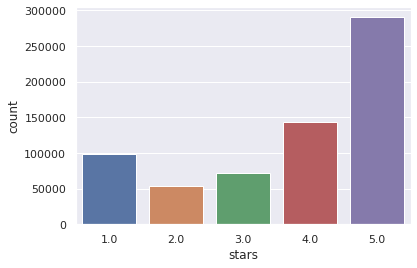

In [113]:
sns.set(style="darkgrid")
_ = sns.countplot(x='stars',data=reviewsDf)

#### Reviews per user

Over 66% of users have just  review and 80% have up to 2 reviews. A possible transformation is to normalize the score of each customer by ther mean, but we dont have enough reviews per customer for it to be a reliable transformation.


Number of users:  376275


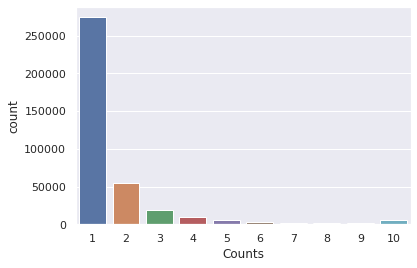

In [148]:
print('Number of users: ', reviewsDf['user_id'].drop_duplicates().shape[0])
counts = reviewsDf['user_id'].value_counts().to_frame(name='Counts')
counts['Counts'] = counts['Counts'].apply(lambda x: 10 if x > 10 else x)
_ = sns.countplot(x='Counts', data=counts)

In [151]:
from sklearn.model_selection import train_test_split

X = reviewsEng['text'] 
Y = reviewsEng['stars'].apply(lambda x: 'negative' if x in [1,2] else 'neutral' if x == 3 else 'positive')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
Y_train.to_csv('data/Y_train.csv', index=False)
Y_test.to_csv('data/Y_test.csv', index=False)

/home/fer/anaconda3/envs/froneus/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys
/home/fer/anaconda3/envs/froneus/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/home/fer/anaconda3/envs/froneus/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  if __name__ == '__main__':
/home/fer/anaconda3/envs/froneus/lib/pyt

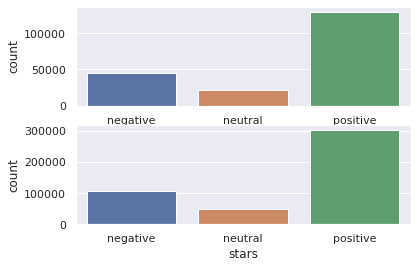

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="darkgrid")

fig, ax =plt.subplots(2,1)
_ = sns.countplot(Y_test.sort_values(), ax=ax[0])
_ = sns.countplot(Y_train.sort_values(), ax=ax[1])

We continue on the **text representation** notebook, where we will evaluate different approaches to represent the space formed by the words in the reviews..